In [5]:
try :
    import pycaret.classification
except:
    !pip install pycaret

## In this case i've been used : 

#### https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

### I hope you enjoy.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret import classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegressionCV

In [3]:
data = pd.read_csv('/kaggle/input/lower-back-pain-symptoms-dataset/Dataset_spine.csv')

In [9]:
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [11]:
data = data.drop('Unnamed: 13',axis=1)

In [16]:
data['Class_att'] = data['Class_att'].apply(lambda x: 1 if x=='Abnormal' else 0)

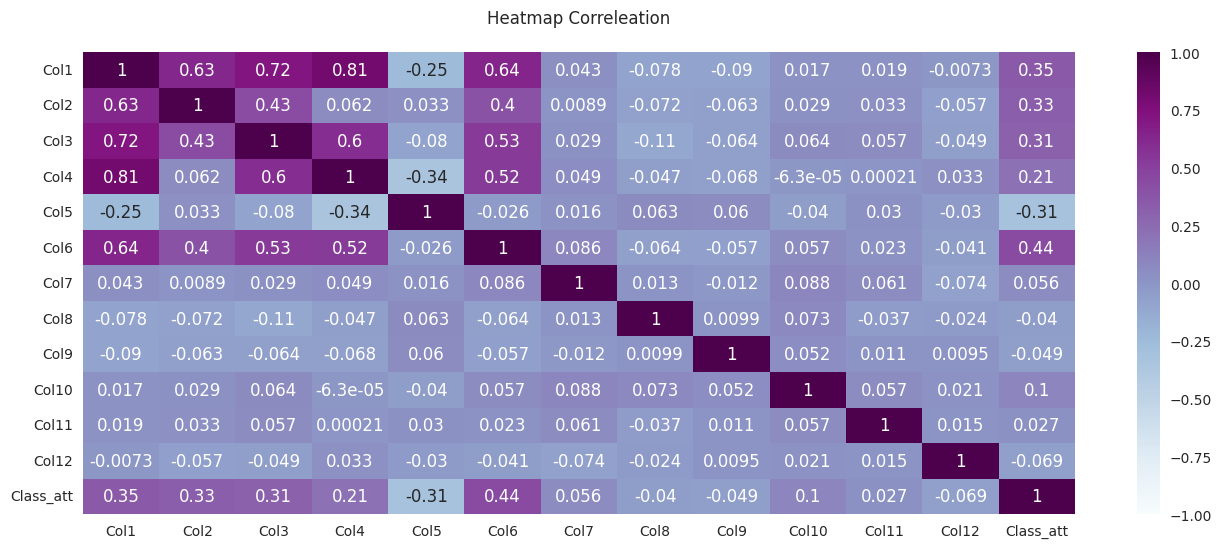

In [24]:
plt.figure(figsize=(16,6))
plt.title('Heatmap Correleation\n')
sns.heatmap(data.corr() , annot=True , cmap='BuPu' , vmin = -1 )
plt.show()

In [21]:
scaler = StandardScaler()
data.loc[:,'Col1' : 'Col12'] = scaler.fit_transform(data.loc[:,'Col1' : 'Col12'])

In [33]:
y = data['Class_att']# for next step
x = data.drop('Class_att',axis=1)# for next step
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size=0.745,random_state=13)
train , test = train_test_split(data , train_size=0.745,random_state=13)

In [29]:
classification.setup(train,target='Class_att')

,Description,Value
0,Session id,2665
1,Target,Class_att
2,Target type,Binary
3,Original data shape,"(230, 13)"
4,Transformed data shape,"(230, 13)"
5,Transformed train set shape,"(161, 13)"
6,Transformed test set shape,"(69, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [31]:
best_model = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8331,0.0000,0.8455,0.9090,0.8681,0.6369,0.6514,0.0170
lr,Logistic Regression,0.8316,0.9024,0.8809,0.8731,0.8751,0.6144,0.6222,0.4610
gbc,Gradient Boosting Classifier,0.8191,0.8830,0.8727,0.8656,0.8657,0.5897,0.6030,0.0720
lightgbm,Light Gradient Boosting Machine,0.8191,0.9005,0.8818,0.8645,0.8685,0.5728,0.5950,0.1900
et,Extra Trees Classifier,0.8074,0.8573,0.8718,0.8490,0.8582,0.5565,0.5642,0.1250
xgboost,Extreme Gradient Boosting,0.8007,0.8906,0.8627,0.8519,0.8537,0.5331,0.5496,0.0450
rf,Random Forest Classifier,0.7952,0.9007,0.8445,0.8592,0.8468,0.5298,0.5418,0.1460
catboost,CatBoost Classifier,0.7945,0.8997,0.8627,0.8415,0.8480,0.5219,0.5392,2.5480
dt,Decision Tree Classifier,0.7824,0.7511,0.8455,0.8347,0.8366,0.5095,0.5222,0.0170
qda,Quadratic Discriminant Analysis,0.7768,0.8408,0.8091,0.8578,0.8261,0.5139,0.5335,0.0180


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [34]:
model = LogisticRegressionCV()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8375

In [36]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(x_test) >= 0.5 ,dtype=int))

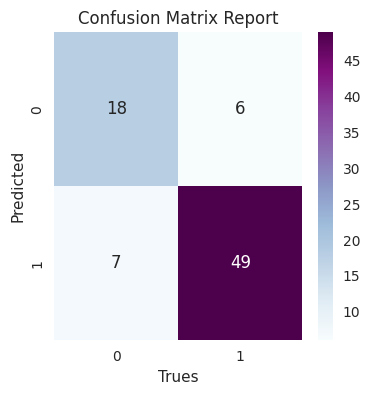

In [43]:
cm = confusion_matrix(y_true,y_pred)
plt.figure(figsize=(4,4))
plt.title('Confusion Matrix Report')
sns.heatmap(cm,annot=True,cmap='BuPu')
plt.xlabel('Trues')
plt.ylabel('Predicted')
plt.show()

In [46]:
print('Classification Report\n\n\n',classification_report(y_true,y_pred))

Classification Report


               precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.89      0.88      0.88        56

    accuracy                           0.84        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.84      0.84      0.84        80



In [48]:
y_test.mean() 
# This shows us that we perform relatively poorly in 0 classes 
# إecause the average is greater than 0.5 and causes skewed classes.

0.7